In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-data-scientists-salary/ds_salaries.csv


putting the data in a dataframe

In [2]:
df=pd.read_csv('/kaggle/input/2023-data-scientists-salary/ds_salaries.csv')
print(df.describe())
print(df.columns)
print(df.info())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_

In [3]:
print(df.head(2))

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   

  company_location company_size  
0               ES            L  
1               US            S  


Now we proceed on removing null data by just dropping rows.

In [4]:
df=df.dropna(axis=0)
df=df.drop(columns='salary_currency')
df=df.drop(columns='salary')

With the unnecessary stuff dropped, we go ahead with solving the problem with the remaining complete data.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

we find out categorical columns next and replace it using one hot encoding technique, that is converting the values into a binary matrix.

the above model just imports the decision tree regressors.

In [6]:
categorical_columns = ['experience_level', 'employment_type','job_title',
                       'employee_residence','company_location',
                       'company_size']

In [7]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Now that we are done hot encoding the text values as numbers, let us explore the nature of our data frame again and lets drop the unnecesary salary and salary currency columns as they do not aid in the prediction in any way , the currency part is already justified by location and residence.

In [8]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


Now we proceed with selecting the predictor variables and the target variable.

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Columns: 251 entries, work_year to company_size_S
dtypes: bool(248), int64(3)
memory usage: 997.5 KB
None


In [10]:
#predictors
features=df.drop(columns=['salary_in_usd'])
X=features
#target variables.
Y=df['salary_in_usd']

Now we have selected values for target and features for predictions.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

We split the data now. And then train the model and test it for various leaf node values.

Now we know that the minimal error is found in around 42 leaves.

We got the minimal value of the error based on number of leaves.

We get the fact that 38 leaf nodes mean the most accurate readings in this case , i.e. sqrt(mse) is 51 k approximately.

In [12]:
regressor_trained = DecisionTreeRegressor(max_leaf_nodes=38,random_state=1)
    # Train the model
regressor_trained.fit(X_train, y_train)
    # Make predictions on the test set
y_pred = regressor_trained.predict(X_test)
    # Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)

2608064863.927558


Now that is a huge mse in this case where we are trying to predict the salaries of people,even on an annual basis.Let us try getting a value of the mean absolute error for a better insight in this case.

In [13]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

37209.57648122867


Now we proceed with the fact that we may predict a salary with + or - 37.2K in USD value.
That infact is INR 30,99,783 i.e around 31 lakh rupees as on 27th of december 2023.
Surely this won't be the case everytime , but further model optimisation will be required for appropriate real life usage.

The next is a scatter plot for comparision of our prediction values.

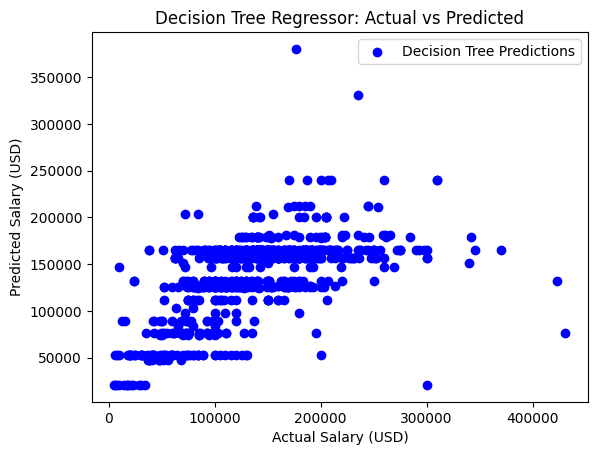

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for Decision Tree Regressor
plt.scatter(y_test, y_pred, color='blue', label='Decision Tree Predictions')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.legend()
plt.show()

We draw a box plot

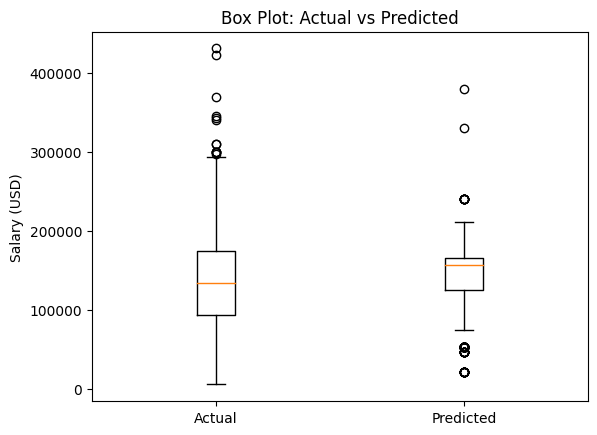

In [15]:
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])
plt.ylabel('Salary (USD)')
plt.title('Box Plot: Actual vs Predicted')
plt.show()

We go for line plots now.Although a line plot based on time would not even be a reliable one.
And that my friends, is the reason we do not go for line plots.

Lets proceed with residual plot

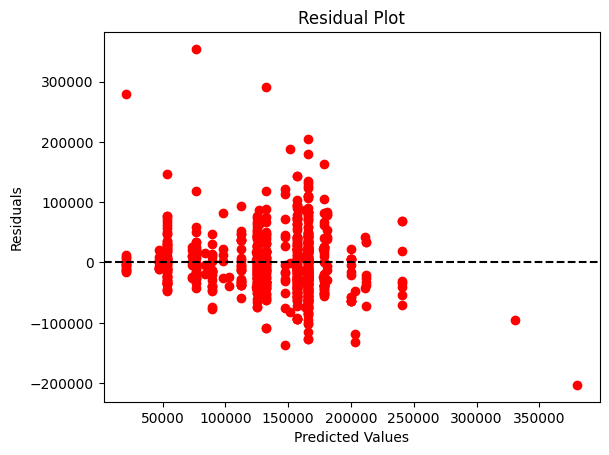

In [16]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The above plot displays the error or residues in individual predictions in case of Various residues, with your own salary predicted via the model , you could judge how reliable your own future prediction is.

We proceed with a distribution plot which plays the same role.

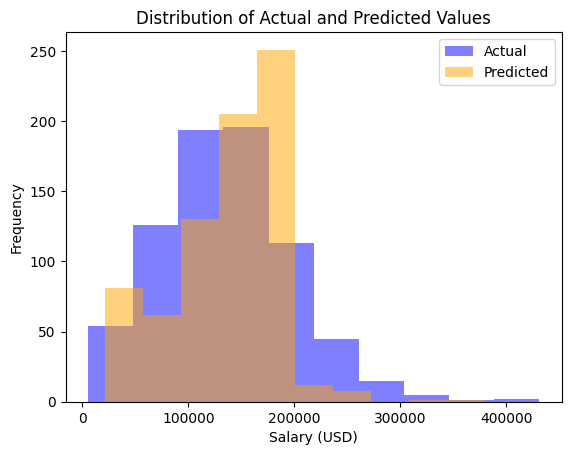

In [17]:
plt.hist(y_test, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, alpha=0.5, label='Predicted', color='orange')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

Now we proceed with a violin plot using seaborn.

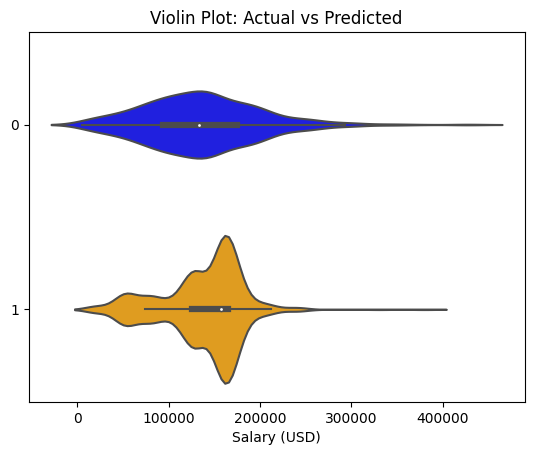

In [18]:
import seaborn as sns
sns.violinplot(data=[y_test, y_pred], orient='h', palette=['blue', 'orange'])
plt.xlabel('Salary (USD)')
plt.title('Violin Plot: Actual vs Predicted')
plt.show()

The above plot is similar to a box plot but with a kernel density estimation, which also describes the frequency.

Feel free to provide suggestions.

We have decided to work further by implementing another ml model on the same dataset for better results.
We go ahead with random forest regression.
We train and retrain and check accuracy till we find out the estimators required for maximum accuracy.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assuming you already have X_train, X_test, y_train, y_test

WE have included the necessary packages now , lets proceed on a function for model building and training.

In [20]:
# Create a Random Forest Regressor
def test_till_best(estimators,X_train,y_train,X_test,y_test):
    rf_regressor = RandomForestRegressor(n_estimators=estimators, random_state=42)
    # Train the model
    rf_regressor.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred_rf = rf_regressor.predict(X_test)
    # Evaluate the model
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    return mae_rf

Lets use the function iteratively to find out the optimal hyperparameters.You may have to tune in the loop function parameters for getting the results done in human time :).

Now based on the value of the estimators , we train and test the data on that hypertuned model for accurate predictions.
we take 2381 estimators.

In [21]:
estimators=2381
rf_regressor = RandomForestRegressor(n_estimators=estimators, random_state=42)
    # Train the model
rf_regressor.fit(X_train, y_train)
    # Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)
    # Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"{mae_rf} is the mean absolute error after hypertuning the model")

36326.17489105133 is the mean absolute error after hypertuning the model


Now we can proceed on plotting the predicted and actual values using various ways to better study the behavioural patterns of our ensemble machine learning model .

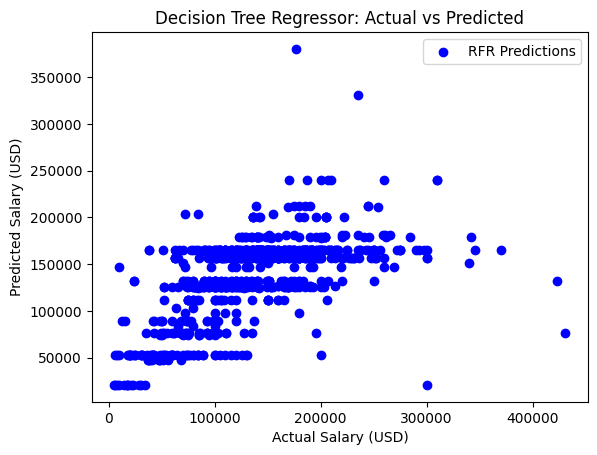

In [22]:
import matplotlib.pyplot as plt

# Scatter plot for Decision Tree Regressor
plt.scatter(y_test, y_pred, color='blue', label='RFR Predictions')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.legend()
plt.show()

boxplot

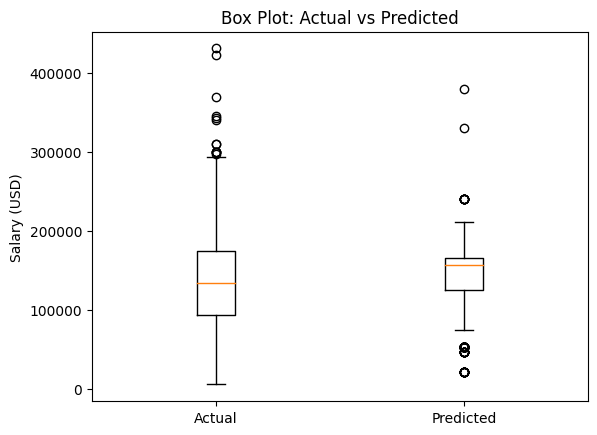

In [23]:
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])
plt.ylabel('Salary (USD)')
plt.title('Box Plot: Actual vs Predicted')
plt.show()

scatter plot of residuals

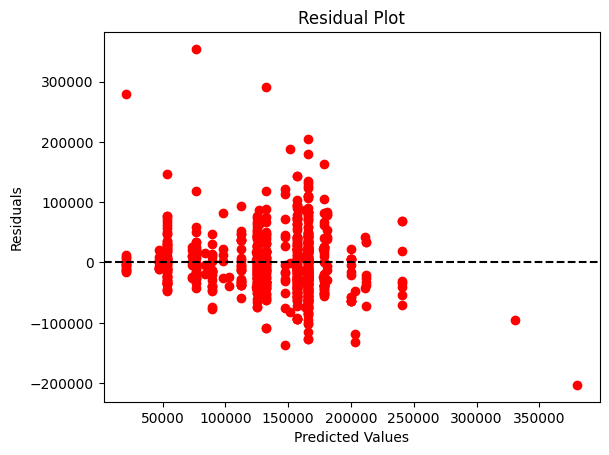

In [24]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

distribution plot

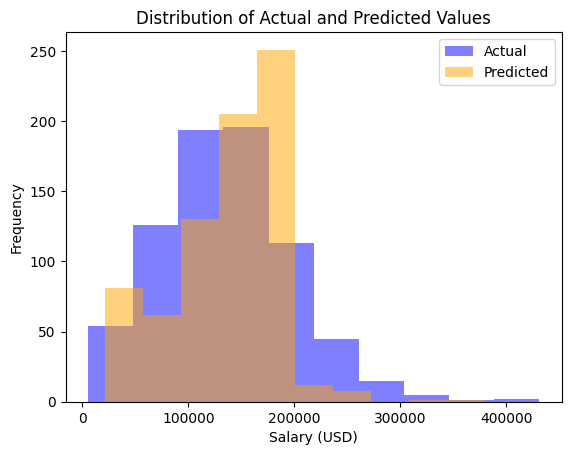

In [25]:
plt.hist(y_test, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, alpha=0.5, label='Predicted', color='orange')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

violin plot

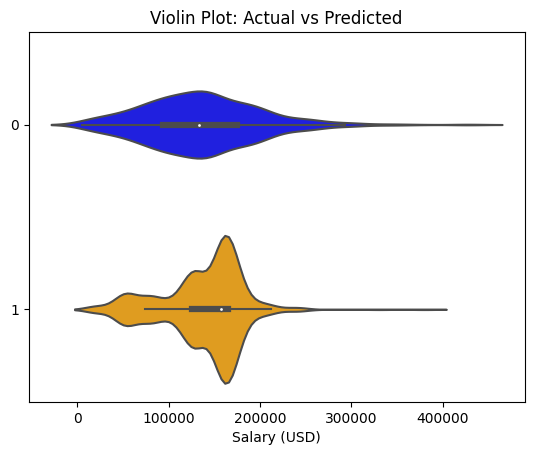

In [26]:
import seaborn as sns
sns.violinplot(data=[y_test, y_pred], orient='h', palette=['blue', 'orange'])
plt.xlabel('Salary (USD)')
plt.title('Violin Plot: Actual vs Predicted')
plt.show()

Now we need to see how further optimisation could be done.

In [27]:
print(f"{mae} and {mae_rf}are the mean absolute errors in both models")

37209.57648122867 and 36326.17489105133are the mean absolute errors in both models


Lets see what parameters can be hypertuned.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Create a random search object
random_search = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42,
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Model to be fitted with best parameters.

In [29]:
# Use the best hyperparameters to create the final model
best_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_bootstrap = best_params['bootstrap']

final_rf_model = RandomForestRegressor(
    n_estimators=best_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    bootstrap=best_bootstrap,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1,  # Use all available CPU cores
)

# Train the final model on the full training dataset
final_rf_model.fit(X_train, y_train)

# Make predictions on the test set
final_y_pred = final_rf_model.predict(X_test)

# Evaluate the final model's performance
final_mae = mean_absolute_error(y_test, final_y_pred)
print(f"Final Mean Absolute Error: {final_mae}")

Final Mean Absolute Error: 36262.07395343955
